In [1]:
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
import json
import string
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/akshayanallathambi/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [2]:
s1 = inaugural.raw('1941-Roosevelt.txt')
s2 = inaugural.raw('1961-Kennedy.txt')
s3 = inaugural.raw('1973-Nixon.txt')

In [3]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [4]:
X=(s1,s2,s3)
for x in X:
    x1 = tokenizer.tokenize(x)
    print('no of real words in speech is',len(x1))

no of real words in speech is 1350
no of real words in speech is 1370
no of real words in speech is 1819


In [5]:
##For speech 1
nltk.download('punkt')
print('The number of sentences = ',len(nltk.sent_tokenize(s1)))
print('The number of words = ',len(nltk.word_tokenize(s1)))
print('The number of letters = ',len(s1))

The number of sentences =  68
The number of words =  1526
The number of letters =  7571


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshayanallathambi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
##For speech 2
print('The number of sentences = ',len(nltk.sent_tokenize(s2)))
print('The number of words = ',len(nltk.word_tokenize(s2)))
print('The number of letters = ',len(s2))

The number of sentences =  52
The number of words =  1543
The number of letters =  7618


In [7]:
##For speech 3
print('The number of sentences = ',len(nltk.sent_tokenize(s3)))
print('The number of words = ',len(nltk.word_tokenize(s3)))
print('The number of letters = ',len(s3))

The number of sentences =  68
The number of words =  2006
The number of letters =  9991


In [8]:
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshayanallathambi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
speech_words_s1 = inaugural.words('1941-Roosevelt.txt')

In [10]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

allwords = (w.lower() for w in speech_words_s1)
allwords_clean_s1 = [word for word in allwords if word not in stopwords]

allwords_freq = nltk.FreqDist(allwords_clean_s1)

print("number of real words in S1 are ",len(allwords_clean_s1),"in Roosevelt speech")

number of real words in S1 are  657 in Roosevelt speech


In [11]:
allwords_clean_s1

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 '--',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'u

In [12]:
from collections import Counter
Counter(allwords_clean_s1)

Counter({'national': 2,
         'day': 4,
         'inauguration': 1,
         'since': 1,
         '1789': 2,
         'people': 7,
         'renewed': 1,
         'sense': 2,
         'dedication': 1,
         'united': 3,
         'states': 4,
         'washington': 2,
         'task': 3,
         'create': 2,
         'weld': 1,
         'together': 2,
         'nation': 12,
         'lincoln': 1,
         'preserve': 1,
         'disruption': 2,
         'within': 3,
         'save': 1,
         'institutions': 1,
         'without': 2,
         'us': 8,
         'come': 2,
         'time': 2,
         'midst': 2,
         'swift': 1,
         'happenings': 1,
         'pause': 1,
         'moment': 1,
         'take': 1,
         'stock': 2,
         '--': 25,
         'recall': 1,
         'place': 1,
         'history': 3,
         'rediscover': 1,
         'may': 2,
         'risk': 1,
         'real': 1,
         'peril': 1,
         'inaction': 1,
         'lives': 2,
     

In [13]:
import pandas as pd

In [14]:
freq1 = pd.Series(' '.join(allwords_clean_s1).split()).value_counts()[:15]
freq1

--           25
nation       12
know         10
life          9
democracy     9
spirit        9
us            8
people        7
america       7
freedom       6
years         6
new           5
body          5
mind          5
men           5
dtype: int64

In [15]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(['--','us','let'])

allwords = (w.lower() for w in speech_words_s1)
allwords_clean_s11 = [word for word in allwords if word not in stopwords]

allwords_freq = nltk.FreqDist(allwords_clean_s11)

print("number of real words in s1 are ",len(allwords_clean_s11),"in Roosevelt speech")

number of real words in s1 are  623 in Roosevelt speech


In [16]:
freq1r = pd.Series(' '.join(allwords_clean_s11).split()).value_counts()[:15]
freq1r

nation       12
know         10
spirit        9
life          9
democracy     9
people        7
america       7
years         6
freedom       6
human         5
body          5
mind          5
speaks        5
new           5
men           5
dtype: int64

In [17]:
speech_words_s2 = inaugural.words('1961-Kennedy.txt')

In [18]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(['--','us','let'])

allwords = (w.lower() for w in speech_words_s2)
allwords_clean_s2 = [word for word in allwords if word not in stopwords]

allwords_freq = nltk.FreqDist(allwords_clean_s2)

print("number of real words in S2 are ",len(allwords_clean_s2),"in Kenny speech")

number of real words in S2 are  669 in Kenny speech


In [19]:
freq2r = pd.Series(' '.join(allwords_clean_s2).split()).value_counts()[:15]
freq2r

sides       8
world       8
new         7
pledge      7
power       5
nations     5
ask         5
citizens    5
free        5
shall       5
help        4
always      4
fellow      4
peace       4
first       4
dtype: int64

In [20]:
speech_words_s3 = inaugural.words('1973-Nixon.txt')

In [21]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(['--','us','let'])

allwords = (w.lower() for w in speech_words_s3)
allwords_clean_s3 = [word for word in allwords if word not in stopwords]

allwords_freq = nltk.FreqDist(allwords_clean_s3)

print("number of real words in S3 are ",len(allwords_clean_s3),"in Nixon speech")

number of real words in S3 are  788 in Nixon speech


In [22]:
freq3r = pd.Series(' '.join(allwords_clean_s3).split()).value_counts()[:15]
freq3r

america           21
peace             19
world             18
new               15
nation            11
responsibility    11
government        10
home               9
great              9
abroad             8
policies           7
role               7
shall              7
better             7
history            7
dtype: int64

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------------

In [27]:
comment_words = ''
stopwords = set(STOPWORDS)

for y in allwords_clean_s11:
    y= str(y)
    tokens = y.split()
    
    for i in range (len(tokens)):
        tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
        
wordcloud = WordCloud(width = 600, height = 600,background_color="pink",
                     stopwords = stopwords, min_font_size = 10).generate(comment_words)

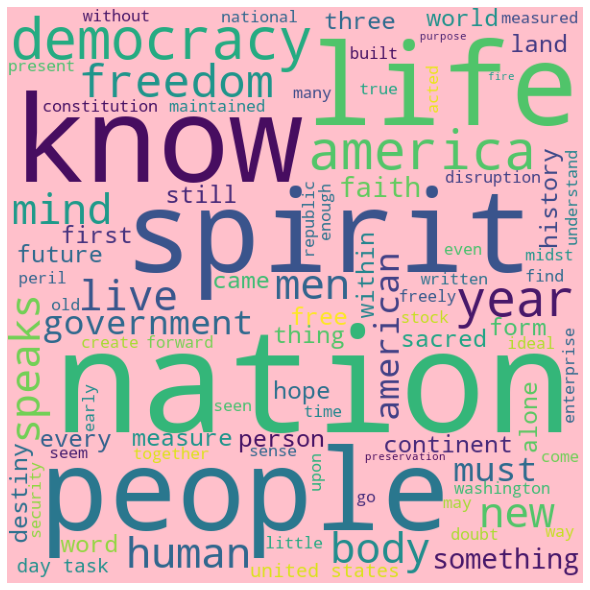

In [25]:
#Plot the wordcloud

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show();

# ------------------------------------------------------------------------------------

In [29]:
comment_words = ''
stopwords = set(STOPWORDS)

for y in allwords_clean_s2:
    y= str(y)
    tokens = y.split()
    
    for i in range (len(tokens)):
        tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
        
wordcloud = WordCloud(width = 600, height = 600,background_color="pink",
                     stopwords = stopwords, min_font_size = 10).generate(comment_words)

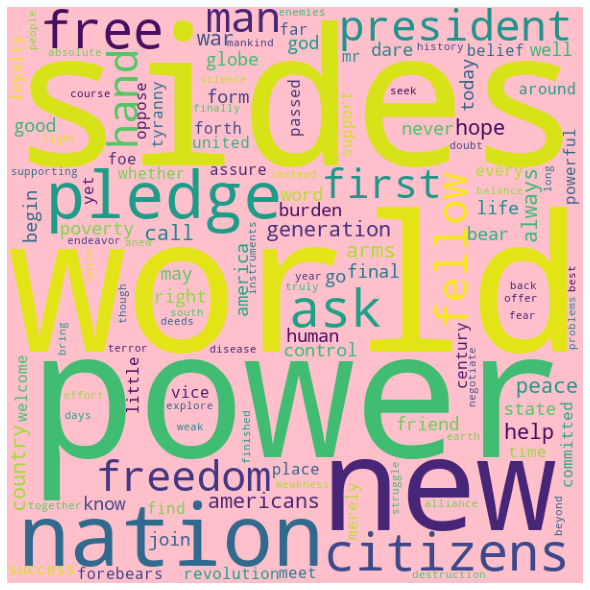

In [30]:
#Plot the wordcloud

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show();

# ------------------------------------------------------------------------------------

In [31]:
comment_words = ''
stopwords = set(STOPWORDS)

for y in allwords_clean_s3:
    y= str(y)
    tokens = y.split()
    
    for i in range (len(tokens)):
        tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
        
wordcloud = WordCloud(width = 600, height = 600,background_color="pink",
                     stopwords = stopwords, min_font_size = 10).generate(comment_words)

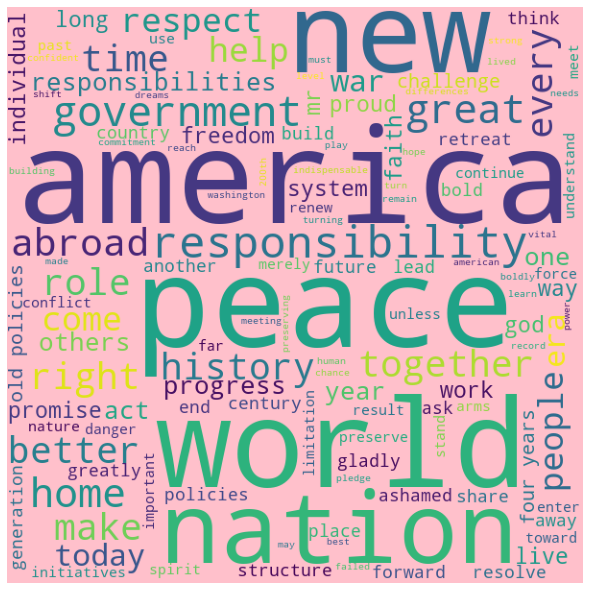

In [32]:
#Plot the wordcloud

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show();